Q1

In [ ]:
from scipy import stats
x = [1, 3, 10, 2, 9, 6, 10, 1, 5, 2]
y1 = [3, 9, 30, 6, 27, 18, 30, 3, 15, 6]
y2 = [4, 12, 103, 7, 84, 39, 103, 4, 28, 7]

print(stats.pearsonr(x, y1))
print(stats.pearsonr(x, y2))

(1.0, 0.0)
(0.981275614524221, 5.257949853805629e-07)


Q2

In [ ]:
x = [2, 3, -1, 2, 2, -1, -2, 1, 4, 0]
y = [4, 9, 1, 4, 4, 1, 4, 1, 16, 0]
print(stats.spearmanr(x, y))

SpearmanrResult(correlation=0.7141254550587829, pvalue=0.02034131486010331)


Q3

In [ ]:
x = [6, 4, 1, 2, 5, 3]
y = [3, 5, 1, 6, 4, 2]
print(stats.kendalltau(x, y))

KendalltauResult(correlation=0.06666666666666665, pvalue=1.0)


Q4

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
y = np.array([4.04, 6.56, 10.67, 13.73, 16.14, 19.14, 21.94, 25.67, 27.98, 30.64])

reg = LinearRegression().fit(x, y)

print(reg.coef_)
print(reg.intercept_)

[2.98163636]
1.251999999999999


Q5

In [ ]:
from sklearn.metrics import r2_score
test_x =  np.array([25, 26, 27, 28, 29, 30]).reshape(-1,1)
test_y = np.array([101.75, 105.75, 109.75, 113.75, 117.75, 121.75])

predict_y = reg.predict(test_x)
print(r2_score(test_y,predict_y))

-16.4738381524203


Q6

In [ ]:
y2=1.25*x+3
n = 10
ans = np.sum(np.square(y2-y))/(n-2)
print(ans)

1835.6858750000006


Q7 (i)

In [ ]:
d=np.array([8.2,10.7,9,8.2,6.4,9.7,6.6,13.4,14.5,5.8]).reshape(-1,1)
n=np.array([7,5,5,7,2,2,1,7,6,7]).reshape(-1,1)
t=np.array([32.35,38.08,33.03,32.11,21.74,32.77,22.69,47.73,50.53,24.85])


x_final=np.concatenate((d,n), axis=1)
reg = LinearRegression().fit(x_final, t)
print(reg.coef_)
print(reg.intercept_)

[3.04651246 0.82939337]
1.343732250401871


Q7 (ii)

In [ ]:
y_pred = reg.predict(x_final)
Adj_r2 = 1 - (1-r2_score(t, y_pred)) * (len(t)-1)/(len(t)-x_final.shape[1]-1)

print(r2_score(t, y_pred))
print(Adj_r2)

0.9989179588965151
0.9986088042955195


Q7 (iii)

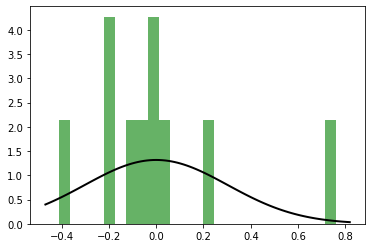

In [ ]:
import matplotlib.pyplot as plt
data = y_pred-t
mu, std = stats.norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

Q8 (i)

In [ ]:
x1 = np.array([8, 11, 9, 8, 6, 10, 7, 13, 14, 6]).reshape(-1,1)
x2 = np.array([6, 4, 5, 7, 1, 1, 0, 7, 6, 7]).reshape(-1,1)
x3 = np.array([49, 40, 23, 39, 6, 32, 7, 47, 26, 21]).reshape(-1,1)
y = np.array([93.26, 89.76, 60.78, 79.34, 28.23, 75.83, 32.74, 105.59, 79.68, 48.86])

x = np.concatenate((x1, x2, x3), axis=1)

reg = LinearRegression()
reg.fit(x, y)
pred = reg.predict(x)

import statsmodels.regression.linear_model as sm
# add a column of ones as integer data type
x = np.append(arr = np.ones((10, 1)).astype(int), 
              values = x, axis = 1)
# choose a Significance level usually 0.05, if p>0.05
#  for the highest values parameter, remove that value
x_opt = x[:, [0, 1, 2, 3]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.143e+05
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.17e-14
Time:                        07:58:12   Log-Likelihood:                 8.5333
No. Observations:                  10   AIC:                            -9.067
Df Residuals:                       6   BIC:                            -7.856
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0399      0.155     13.156      0.000       1.660       2.419
x1             3.0063      0.018    163.520      0.000       2.961       3.051
x2             0.0116      0.021      0.562      0.594      -0.039       0.062
x3             1.3675      0.004    332.800      0.000       1.357       1.378
==============================================================================
Omnibus:                        0.926   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.636
Skew:                           0.165   Prob(JB):                        0.728
Kurtosis:                       1.809   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt = x[:, [0, 1, 3]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.901e+05
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.68e-17
Time:                        07:58:12   Log-Likelihood:                 8.2765
No. Observations:                  10   AIC:                            -10.55
Df Residuals:                       7   BIC:                            -9.645
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0531      0.146     14.103      0.000       1.709       2.397
x1             3.0062      0.017    172.144      0.000       2.965       3.048
x2             1.3688      0.003    428.085      0.000       1.361       1.376
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   2.771
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.713
Skew:                           0.265   Prob(JB):                        0.700
Kurtosis:                       1.804   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = np.concatenate((x1, x3), axis = 1)
reg = LinearRegression()
reg.fit(x, y)
print(reg.coef_)
print(reg.intercept_)

[3.00624257 1.368844  ]
2.0530921883705417


Q8 (ii)

In [ ]:
import pandas as pd
x1 = np.array([8, 11, 9, 8, 6, 10, 7, 13, 14, 6])
x2 = np.array([6, 4, 5, 7, 1, 1, 0, 7, 6, 7])
x3 = np.array([49, 40, 23, 39, 6, 32, 7, 47, 26, 21])
y = np.array([93.26, 89.76, 60.78, 79.34, 28.23, 75.83, 32.74, 105.59, 79.68, 48.86])
xy = np.vstack((x1, x2, x3, y))
xy_ = np.transpose(xy)
df = pd.DataFrame(xy_, columns = ['x1','x2','x3', 'y'])
df.corr()

,x1,x2,x3,y
x1,1.000000,0.307258,0.497214,0.719675
x2,0.307258,1.000000,0.626283,0.600789
x3,0.497214,0.626283,1.000000,0.960225
y,0.719675,0.600789,0.960225,1.000000


In [ ]:
x = x3.reshape(-1,1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
print(r2_score(y,y_pred))

print('*'*20)

x = np.concatenate((x1.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
print(r2_score(y,y_pred))

print('*'*20)

x = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
print(r2_score(y,y_pred))

0.9220319219670723
********************
0.999981586725961
********************
0.9999825085660973


Q9

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.05)

x=np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
clf.fit(x,y)

y_pred = clf.predict(x)
print(r2_score(y, y_pred))

print(clf.coef_)
print(clf.intercept_)

0.9999810742555482
[2.99757700e+00 1.02664301e-03 1.36927537e+00]
2.1157887650662133


Q10

In [ ]:
from sklearn.linear_model import Ridge

x1 = np.array([15,17,16,15,14,16,14,19,20,14]).reshape(-1,1)
x2 = np.array([7,5,5,7,1,2,1,7,6,7]).reshape(-1,1)
x3 = np.array([22,22,21,22,15,18,15,26,26,21]).reshape(-1,1)
y = [797.2,793.8,758.7,792.5,536.4,651.1,543.2,937.1,943.1,755.2]
x=np.concatenate((x1,x2,x3), axis=1)
clf = Ridge(alpha=1.0)
clf.fit(x,y)

y_pred = clf.predict(x)
print(r2_score(y, y_pred))

print(clf.coef_)
print(clf.intercept_)

0.9996407889089124
[12.35311234 11.7794984  24.13261074]
-5.3196931402092105


In [ ]:
from scipy import stats

x = [-6.02, 8.46, 1.4, 8.54, 6.84, 4.26, -1.23, -0.22, -4.13, 2.27]
y = [6.58, 5.32, 0.99, 8.06, 7.62, 1.6, 3.4, 4.24, 7.89, 0.28]
print(stats.spearmanr(x, y))
print(stats.pearsonr(x, y))
print(stats.kendalltau(x, y))

SpearmanrResult(correlation=0.11515151515151514, pvalue=0.7514196523258483)
(0.035225378379322034, 0.9230400262185328)
KendalltauResult(correlation=0.06666666666666667, pvalue=0.8618005952380953)


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

d=np.array([6.3, 10.61, 13.21, 9.4, 10.56, 12.1, 7.27, 13.54, 7.62, 5.21]).reshape(-1,1)
n=np.array([14.81, 11.32, 11.94, 10.15, 9.45, 9.66, 7.64, 6.45, 11.95, 13.01]).reshape(-1,1)
t=np.array([49.15, 45.08, 59.86, 50.5, 37.28, 35.66, 26.52, 30.94, 39.37, 45.25])


x_final=np.concatenate((d,n), axis=1)
reg = LinearRegression().fit(x_final, t)
print(reg.coef_)
print(reg.intercept_)

[1.87372763 4.00152296]
-18.5612593608586


In [ ]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x_final)
Adj_r2 = 1 - (1-r2_score(t, y_pred)) * (len(t)-1)/(len(t)-x_final.shape[1]-1)

print(r2_score(t, y_pred))
print(Adj_r2)

0.726797139167411
0.6487391789295284


-4.973799150320701e-15
4.941353876437953


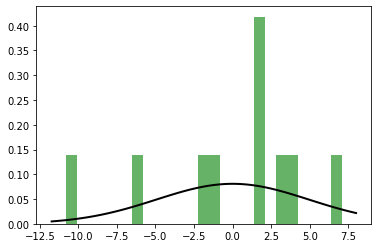

In [ ]:
import matplotlib.pyplot as plt
data = y_pred-t
mu, std = stats.norm.fit(data)

print(mu)
print(std)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
63.19/64.48

0.9799937965260545

In [ ]:
7.33 - 4.1*0.98

3.3120000000000003

In [ ]:
x=np.array([3.09, 2.99, 6.25, 4.8, 1.27, 3.33,1.06, 8.06, 5.9, 5.66]).reshape(-1,1)
y=np.array([12.9, 15.28, 20.38, 18.06, 9.52, 14.89, 7.45, 27.73, 20.95, 18.27])

reg = LinearRegression().fit(x, y)
print(reg.coef_)
print(reg.intercept_)

[2.54743814]
5.739314863594958


In [ ]:
y_pred = reg.predict(x)
Adj_r2 = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)

print(r2_score(y, y_pred))
print(Adj_r2)

0.9576626974982985
0.9523705346855857


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x = np.array([23.7, 11.7, 9.3, 15.6, 20.1, 27.6])
y = np.array([6087.0, 857.7, 467.1, 1811.4, 3840.9, 9650.4])

Input=[('polynomial', PolynomialFeatures(degree=6)),('modal', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

poly_pred = pipe.predict(x.reshape(-1,1))
print('RMSE for Polynomial Regression=>', np.sqrt(mean_squared_error(y, poly_pred)))

RMSE for Polynomial Regression=> 1.7756152497080808e-08


In [ ]:
mse = mean_squared_error(y, poly_pred)
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

from math import log
num_params=4
aic = calculate_aic(len(y), mse, num_params)
print(aic)

In [ ]:
x1 = np.array([11, 7, 8, 11, 14, 6, 8])

In [ ]:
d=np.array([11.9,16.9,17.2,16.9,12.5,7.7,6.0,1.1,5.5,9.6]).reshape(-1,1)
cs=np.array([4.2,2.7,2.3,4.3,2.0,3.4,2.2,4.8,1.1,4.4]).reshape(-1,1)
ca=np.array([2.6,4.1,2.8,3.6,3.7,3.1,2.9,3.9,1.0,2.6]).reshape(-1,1)
cf=np.array([1.3,3.8,1.5,1.1,2.0,1.2,1.5,2.2,4.6,2.5]).reshape(-1,1)
ft=np.array([9.0,2.0,2,8.0,4.0,7.0,8.0,3,1,4]).reshape(-1,1)


y=[295.2,375.2,132.4,273,393.6,418.1,401.8,633.4,301.6,372.2]

x_final=np.concatenate((d,ca,cs,cf), axis=1)

res = sm.OLS(y, x_final).fit()

# Façon 1
res.aic 